In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
# Data Preprocessing
X_train = train_df.drop(["label"], axis=1)
Y_train = train_df["label"]

X_train = np.array(X_train).reshape(-1, 28, 28, 1)
Y_train = np.array(Y_train).reshape(-1, 1)
X_test = np.array(test_df).reshape(-1, 28, 28, 1)

X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train, num_classes=10)

In [5]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
n_classes = Y_train.shape[1]
image_size = X_train.shape[1:]

print(f"There are {n_train} training examples")
print(f"There are {n_test} testing examples")
print(f"There are {n_classes} classes")
print(f"Image shape: {image_size}")

There are 42000 training examples
There are 28000 testing examples
There are 10 classes
Image shape: (28, 28, 1)


In [6]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
train_gen = datagen.flow(X_train, Y_train, batch_size=64)

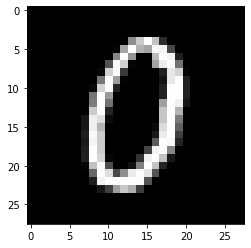

In [7]:
index = 5
printing_digit = X_train[index].reshape(28, 28)
plt.imshow(printing_digit, cmap="gray")

In [8]:
model = Sequential([
    Input(shape=(28,28,1), name='digits'),
    Conv2D(32, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(32, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(32, (5,5), strides=2, padding="same", activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    Conv2D(64, (5,5), strides=2, padding="same", activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(128, (4,4), activation="relu"),
    BatchNormalization(),
    Flatten(),
    Dropout(0.4),
    Dense(10, activation="softmax")
])

model.compile(optimizer="Adam", loss=categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [9]:
model.fit(train_gen, epochs=50)

Epoch 1/50
657/657 [==============================] - 100s 153ms/step - loss: 0.4336 - accuracy: 0.8668
Epoch 2/50
657/657 [==============================] - 102s 155ms/step - loss: 0.1284 - accuracy: 0.9616
Epoch 3/50
657/657 [==============================] - 108s 164ms/step - loss: 0.0946 - accuracy: 0.9704
Epoch 4/50
657/657 [==============================] - 99s 151ms/step - loss: 0.0829 - accuracy: 0.9757
Epoch 5/50
657/657 [==============================] - 100s 152ms/step - loss: 0.0722 - accuracy: 0.9782
Epoch 6/50
657/657 [==============================] - 99s 151ms/step - loss: 0.0636 - accuracy: 0.9810
Epoch 7/50
657/657 [==============================] - 99s 151ms/step - loss: 0.0577 - accuracy: 0.9822
Epoch 8/50
657/657 [==============================] - 100s 152ms/step - loss: 0.0610 - accuracy: 0.9816
Epoch 9/50
657/657 [==============================] - 98s 150ms/step - loss: 0.0536 - accuracy: 0.9840
Epoch 10/50
657/657 [==============================] - 100s 152ms/st

In [10]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

7


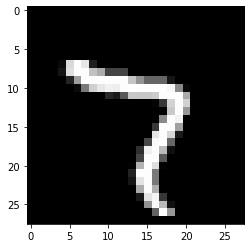

In [11]:
index = 98
printing_digit = X_test[index].reshape(28, 28)
print(Y_pred[index])
plt.imshow(printing_digit, cmap="gray")

In [12]:
submission = pd.DataFrame({
    "ImageId": range(1, 28001),
    "Label": Y_pred.tolist()
})
submission.to_csv("/kaggle/working/submission.csv", index=False)